## Question 2 a)
### $ \frac{d \tilde{M}}{d\tilde{r}} $ Derivation
First, we start by differentiating $\tilde{M}$ w.r.t. $\tilde{r}$. That is we have 
$$ \frac{d\tilde{M}}{d\tilde{r}} = \frac{1}{M_0}\frac{dM}{d\tilde{r}}$$

Which we expand using the chain rule to get 
$$\frac{d\tilde{M}}{d\tilde{r}} = \frac{1}{M_0}\frac{dM}{dr} \frac{dr}{d\tilde{r}} $$

In which we replace the mass continuity equation as well as $\frac{dr}{d\tilde{r}} = \frac{GM_0 \mu m_p}{kT}$ to get 
$$ \frac{d\tilde{M}}{d\tilde{r}} = \frac{1}{M_0} (4\pi r^2 \rho)(\frac{GM_0 \mu m_p}{kT})$$

We substitute r and rho as given in the problem statement to get 
$$ \frac{d\tilde{M}}{d\tilde{r}} = \frac{1}{M_0} 4 \pi \tilde{r}^2 (\frac{G M_0 \mu m_p}{kT})^3 \tilde{\rho} M_0 (\frac{kT}{G M_0 \mu m_p})^3 $$

After which we see all the constants cancel out, meaning we are left with the dimensionless DE 
$$\frac{d\tilde{M}}{d\tilde{r}} = 4 \pi \tilde{r}^2 \tilde{\rho}$$

### $ \frac{d\tilde{\rho}}{d\tilde{r}}$ Derivation

In a simillar fashion, we can start from $ \frac{d\tilde{\rho}}{d\tilde{r}}$ and expand it uding the chain rule. We will also need the equation of state $P= \frac{\rho kT}{\mu m_p}$. The expanded differential is 
$$ \frac{d\tilde{\rho}}{d\tilde{r}} = \frac{d \tilde{\rho}}{d\rho} \frac{d\rho}{dP} \frac{dP}{dr} \frac{dr}{d \tilde{r}} $$

Where we make note of the factor dP/dr which for our case is simply the hydrostatic equilibrium equation dP/dr. We obtain the other differential factors from our dimensionless variable definition and $\frac{d\rho}{dP}$ from the equation of state. That is we have:
$$\frac{d\tilde{\rho}}{d\rho} = \frac{1}{M_0}(\frac{GM_0 \mu m_p}{kT})^3$$
$$\frac{d\rho}{dP} = \frac{\mu m_p}{kT}$$
$$\frac{dP}{dr} = \frac{-GM\rho}{r^2}$$
$$\frac{dr}{d\tilde{r}} = \frac{GM_0 \mu m_p}{kT}$$

Hence, we can write 
$$ \frac{d\tilde{\rho}}{d\tilde{r}} = \frac{1}{M_0^2 G}(\frac{GM_0 \mu m_p}{kT})^4 \frac{G M_0 \mu m_p}{kT} \frac{dP}{dr} $$
$$ \frac{d\tilde{\rho}}{d\tilde{r}} = \frac{1}{M_0^2 G}(\frac{GM_0 \mu m_p}{kT})^5 \frac{dP}{dr}$$

Where we can rewrite dPdr in terms of our dimensionless quantities and we see that indeed the constant factors drop out and we are left with a simple and clear dimensionless DE
$$\frac{dP}{dr} = -\frac{GM_0^2 \tilde{M} \tilde{\rho} }{\tilde{r}^2} (\frac{kT}{GM_0 \mu m_p})^5$$

And we are left with 
$$\frac{d\tilde{\rho}}{d\tilde{r}} = -\frac{\tilde{M}\tilde{\rho}}{\tilde{r}^2} $$

## DE's 2a)
$$\frac{d\tilde{M}}{d\tilde{r}} = 4 \pi \tilde{r}^2 \tilde{\rho}$$
$$\frac{d\tilde{\rho}}{d\tilde{r}} = -\frac{\tilde{M}\tilde{\rho}}{\tilde{r}^2} $$


## Question 2b)
We create a basic set-up in our code to solve ODE's. We do this by creatting a general ODE solver class which has a method to solve general coupled DE's. This simply makes solving our coupled DE's more straight forward and keeps our code cleaner. Next, we make a class for our isothernal gas spheres which inherits from the DE class to be able to solve our DE system while keeping our DE code sperate which makes debugging much easier. We have a method to represent our system of DE explicitly which we use to numerically solve the DE. We have boundary conditions at the origin (pseudo initial conditions) with the rho~(0) = 1 and M(0) = 0 since this is a result of rho being finite at the center (r=r~=0). 

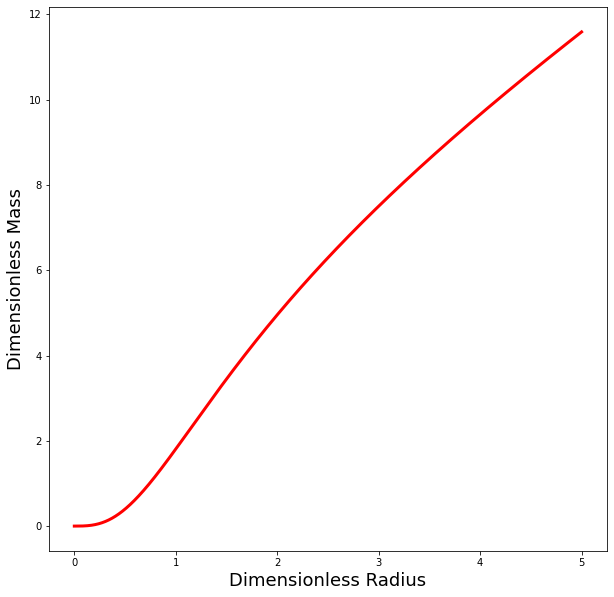

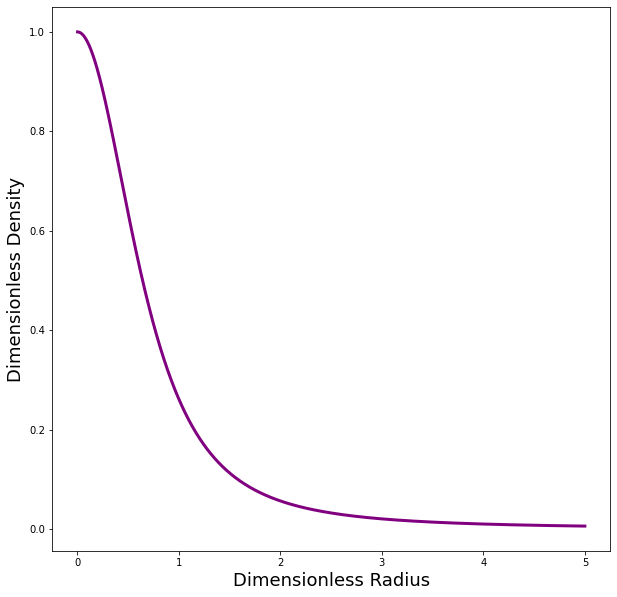

In [192]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as ode
import scipy.constants as const

class Ode:
    def __init__(self, f, y0, h, ti, tf):

        self.y0 = y0
        self.ts = np.arange(ti,tf,h)


    #method to solve an IVP for the ODE that is passed
    def solve(self):
        return ode.odeint(self.f,self.y0, self.ts)


class IsothermalSphere(Ode):
    def __init__(self, mu = 2.4, M = 1.989e30,T = 10, y0 = (0,1), h = 0.001, ti = 0.001, tf = 5):
        Ode.__init__(self, self.f, y0, h, ti, tf)
        #DE utilities/variables/solutions
        solved = self.solve()
        self.Mbar = solved[:,0]
        self.rhobar = solved[:,1]

        #properties for c) and d)
        self. M = M
        self.T = T
        self.mu = mu

        #truncation index
        trunc = 300

        #computing unscalled radius
        self.r = self.ts[trunc:]*(const.G*self.M*self.mu*const.proton_mass/(self.Mbar[trunc:]*const.k*self.T))/(1.5e11) #in AU

        #mult. factor to make code cleaner
        f1 = (const.k*self.T/(self.mu*const.proton_mass))**4

        #compute Psurface
        self.Ps = self.rhobar[trunc:]/(const.G**3)*(self.Mbar[trunc:]/self.M)**2 *f1


        #Jean's Mass
        
        MJ = lambda r: 0.2 * self.M * ((4*np.pi*((r*1.5e11)**3*3e-15)/(3*self.M)**(1/2)))
       
        self.MJ = MJ(self.r)

      


    def f(self,y , t):
        Mbar = y[0]
        rhobar = y[1]

        return np.array([4*np.pi * (t**2) * rhobar, - (Mbar *rhobar)/(t**2)])

    def plotMbar(self):
        plt.figure(figsize = (10,10))
        plt.plot(self.ts, self.Mbar, 'r', linewidth = 3)
        plt.ylabel("Dimensionless Mass").set_fontsize(18)
        plt.xlabel("Dimensionless Radius").set_fontsize(18)

    def plotrhobar(self):
        plt.figure(figsize = (10,10))
        plt.plot(self.ts, self.rhobar, 'purple', linewidth = 3)
        plt.ylabel("Dimensionless Density").set_fontsize(18)
        plt.xlabel("Dimensionless Radius").set_fontsize(18)

    def plotPs(self):
        plt.figure(figsize = (15,10))
        
        plt.plot(self.r, self.Ps, 'b', linewidth = 3)
        plt.ylabel("Surface Pressure [N/m^2]").set_fontsize(18)
        plt.xlabel("Radius [AU]").set_fontsize(18)

    def plotMJ(self):
        plt.figure(figsize = (15,10))
        
        plt.plot(self.r, self.MJ/self.M, 'g', linewidth = 3)
        plt.ylabel("Jean's Mass [Msun]]").set_fontsize(18)
        plt.xlabel("Radius [AU]").set_fontsize(18)

     



test = IsothermalSphere()
test.plotMbar()
test.plotrhobar()

## Question 2 c)
First, we note that indeed for large values of r~, M(r~) scales approximately as r~, or more consicely that for large r~ $$\frac{d\tilde{M}}{d\tilde{r}} \propto 1 $$ as stated in the question. Generally speaking, we wish to evaluate the surface pressure of an isothermal sphere, to do so we set the equation of state equal to Ps and thus have $$P_s = \rho \frac{kT}{\mu m_p}$$

Also, as stated in the problem statement we define $M_0 = \frac{M}{\tilde{M(\tilde{r})}}$ and use this to recover values of r over which to our surface pressure values. As for our surface pressure, we compute values for rho by using the given formula and substituting an appropriate M_0. Hence, we compute the surface pressure as 
$$ P_s (r) = \tilde{\rho}(r)M_0 (\frac{1}{G M_0})^3 (\frac{kT}{\mu m_p})^4 $$
$$ P_s (r) = (\frac{\tilde{\rho}(r)}{G})^3 (\frac{\tilde{M}}{M})^2 (\frac{kT}{\mu m_p})^4 $$

We also note that rho~ evaluated at r~, (r~, rho~), is the same as rho~ evaluated r(r~), (r(r~), rho~(r)). Hence, rho~(r) in our surface pressure can be replaced by our answer rho~ from b) and safely be plotted against our comoputed values for r. Similarly, we use our value of M~(r~) to safely calculate our values of M_0  over our working range (and thus safely plot our answer Ps for our calculated values of). The argument is the same as for rho~. 

The bulk of the code can be found within the class we defined for b), comments are provided for clarity. Since near r = 0, M~ is very small and we encounter division by zero errors (overflow or very large number), and as such it makes it very hard to study the shape/peak of the function. For those purpouses, we truncate a few points from our data for large r (i.e. points for small Mbar). We also note that if we solve our solution for larger intervals of r~ we will start seeing the spiral as seen in Bonnor's paper. 

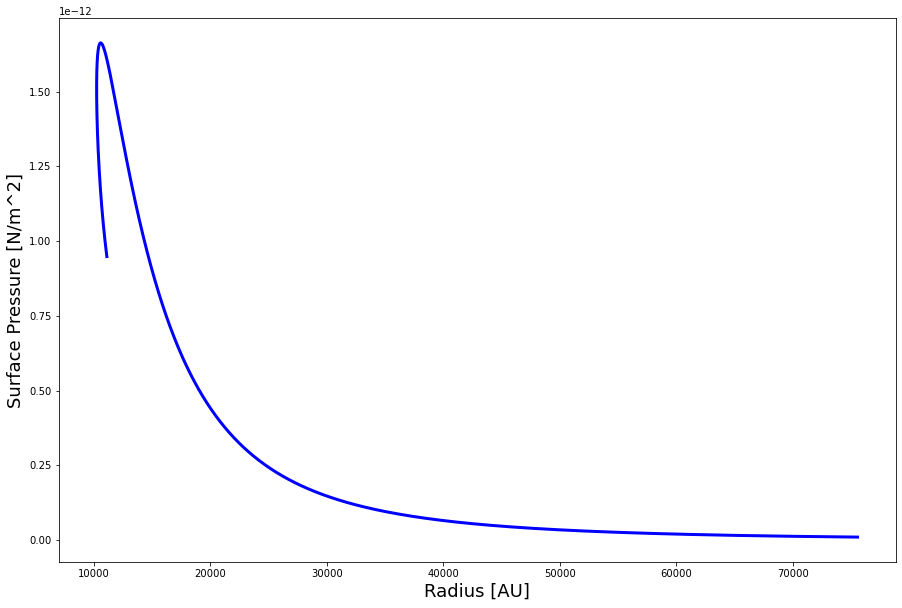

In [193]:
test.plotPs()

## Question 2d)
Here, we consider the Jean's Mass formula as seen in lectures and the texbtook $M_J = 0.2 M_\odot (\frac{T}{10})^{3/2} (\frac{\rho}{3E-15})^{-1/2}$ where we use the average spherical density for a gas as given in the question to find 
$$M_J = 0.2 M_\odot (\frac{T}{10})^{3/2} (\frac{3M}{4 \pi R^3} 3E-15)^{-1/2}$$

For us, M is simply 1 solar mass and we plot M_J for different values of R. As we can see in our plot, the Jean's mass vanishes at the pressure peak. We know that the Jean's mass is the upper mass limit that a gas cloud can be stable to gravitational collapse. Hence, hence if a gas cloud of a certain radius is heavier than the Jean's Mass we expect it to collapse. In essence, for a gas cloud with given T, M and R the cloud will collapse for MJ = M(RJ) thus for our cloud around 4.6*10^4 AU. What we can conclude from our graph is that for a gas cloud with a radius equal to the radius of our pressure peak in c), a gas cloud of any mass (for the same temperatures) would be unstable to gravitational collapse and would collapse regardless of it's mass. 

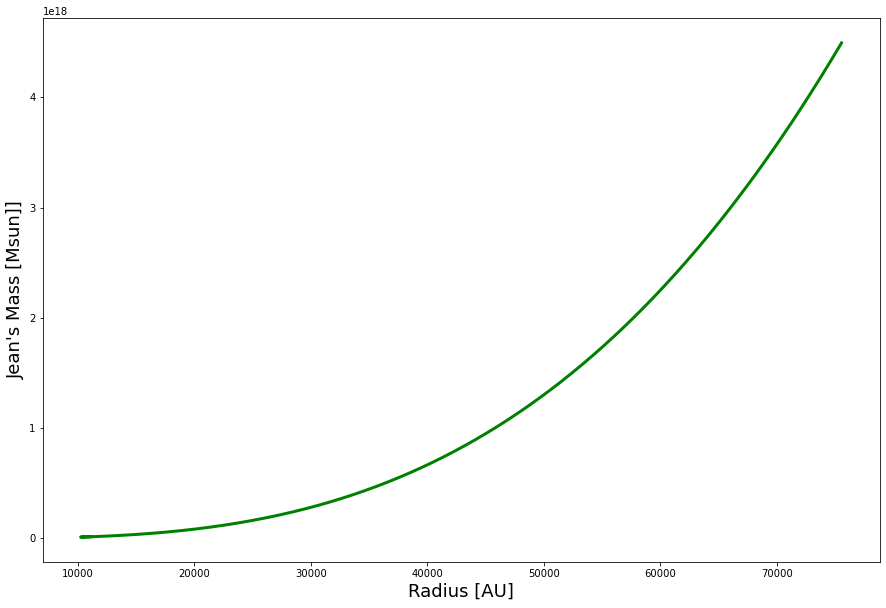

In [194]:
test.plotMJ()

## Question 3 a)
Here, we start by using the given relation for M_J and use this and other known facts about collapse dynamics and thermodynamics. 
$$M_J \propto \frac{c_s^3}{\rho^{1/2}} $$

We have an isothermal process (collapse) which means that our temperature stays constant, this is extremely useful information as it will allow us to establish proportionality relations betweeb c_s and R. Notably, we have $c_s \propto T^{1/2} \propto \text{constant}$. This means that 
$$M_J \propto \rho^{-1/2}$$

We also have $tff \propto \rho^{-1/2}$ which means 
$$ M_J \propto tff$$

And for a sphere of a given mass we can write $\rho \propto R^{-3}$ which leaves us with
$$ M_J \propto R^{3/2}$$

and we have $\eta = 3/2$

Generally speaking, the cloud is becoming more stable as r shrinks (M_J approaches 0) but it grows as r grows


## Question 3 b)
For this part, we start by noting what v_a is porportional to, that is
$$ v_a \propto B\rho^{-1/2} \propto R^{-2} R^{3/2} \propto R^{-1/2}$$

Where we use similar arguments as in a) for the proportionality of rho and we use the given proportionality for B. Again, similarly as in a) cs will be proportional to a constant since it is proportional to temperature and we are in an isothermal process. 

Hence $$\frac{v_a}{c_s} \propto R^{-1/2}$$ and we have $\eta = -\frac{1}{2}$


## Question 3 c)
didn't have time to fully work it out but logically I would expect both pressures to be equal when va/cs = 1 if we go by the given equations. 

## Question 3 d)
For this question, we replace c_s in our derivation for part a), thus we have $$ M_J \propto v_a^3 \rho^{-1/2}$$ and we substitute the proportionality relations for rho and va (found in part a and b respectivly). This leaves us with 
$$ M_J \propto R^{-3/2} R^{3/2} \propto 1$$

which means that $\eta = 0$. This may seem strange at first but would make sense considering the premise of this question is that magnetic fields aid in supporting gas clouds from collapsing. Here we see that taking magnetic stresses into account, M_J loses it's R dependence and is effectively constant regardless of R. This has an important implication in that when R is smaller than R_a, MJ is constant meanwhile for R>RA MJ follows the radial powerlaw we derived in a). Qualitatively we have the following sketch (can't figure out how to display it in notebook, image attached, soooooo sorry about this). Hence, we see that flux-frozen magnetic fields cannot prevent collapse since the cloud is already collapsing. The reasoning behind this is that the mass of the cloud would have no way to end up under the Jean's mass curve since it starts above it and MJ is monotonic. However, if the initial mass is larger than the Jean's mass we have when R is smaller than RA, then magnetic forces cannot stop collapse unless the cloud sheds mass in some way (star formation?). 

## Question 3 e)
Here, if we use alpha = 2 we have $B \propto R^{-4}$ $v_a \propto B \rho^{-1/2} \propto R^{-4} R^{3/2} \propto R^{-5/2}$. Using our proportionality relation for MJ from d) we then have 
$$ M_J \propto R^{-15/2}R^{3/2} \propto R^{-6}$$

An image of our sketch is provided (so sorry again for this). Here, qualitatively we see that magnetic forces can play an important role in star formation, more specifically in stopping gravitational collapse. What this implies is that a cloud that is initially collapsing would become supported by magnetic fields resulting from star formation. In other words, if we look at the sketch, a cloud that is initially collapsing would assuradly form stars after it enters the rapid star formation region. Upon entering the region, the cloud would rapidly collapse but at some point, the Jean's mass will become higher than the mass of the cloud. This is for 2 reasons: first, part of the mass of the molecular cloud would make up the forming stars and would be in hydrostatic equilibrium hence no longer part of our dynamic cloud. The 2nd is our qualitative sketch fr=or MJ which clearly shows that a collapsing cloud of a given mass would eventually reach a radius where the Jean's mass exceeds the mass of the cloud and thus the cloud starts being supported again. Hence, considering both effects we would expect that for Rsf some of the gas would be falling into stars which would mean that the mass the cloud needs to support would start decreasing until it becomes lower than the Jean's mass and the cloud is able to suppport itself again. 